In [218]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

In [219]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

In [220]:
# Examine country GeoDataFrame
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


<AxesSubplot:>

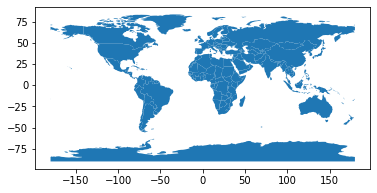

In [221]:
# Basic plot, random colors
world.plot()

c:\Users\NSA\AppData\Local\Programs\Python\Python310\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


<AxesSubplot:>

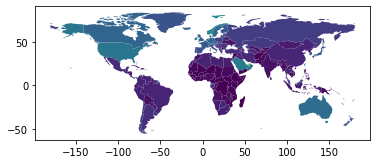

In [222]:
# Plot by GDP per capita
world = world[(world.pop_est>0) & (world.name!="Antarctica")]

world['gdp_per_cap'] = world.gdp_md_est / world.pop_est

world.plot(column='gdp_per_cap')


<AxesSubplot:>

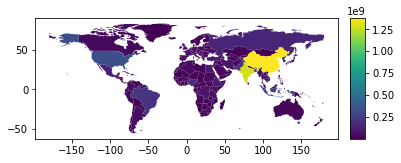

In [223]:
# Plot population estimates with an accurate legend
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(1, 1)

divider = make_axes_locatable(ax)

cax = divider.append_axes("right", size="5%", pad=0.1)

world.plot(column='pop_est', ax=ax, legend=True, cax=cax)

<AxesSubplot:>

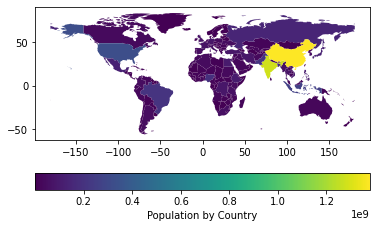

In [224]:
# Plot population estimates with an accurate legend
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)

world.plot(column='pop_est',
           ax=ax,
           legend=True,
           legend_kwds={'label': "Population by Country",
                        'orientation': "horizontal"})

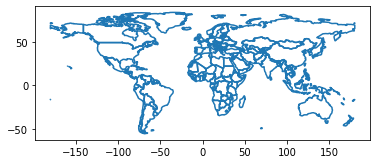

In [225]:
world.boundary.plot();

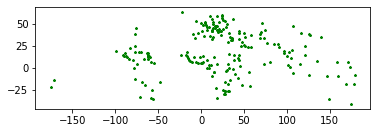

In [226]:
#Maps with layers There are two strategies for making a map with multiple layers – one more succinct, and one that is a little more flexible.
#Before combining maps, however, remember to always ensure they share a common CRS (so they will align).

# Look at capitals
# Note use of standard `pyplot` line style options
cities.plot(marker='*', color='green', markersize=5);

# Check crs
cities = cities.to_crs(world.crs)

# Now we can overlay over country outlines
# And yes, there are lots of island capitals
# apparently in the middle of the ocean!

<AxesSubplot:>

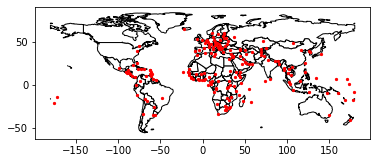

In [227]:
# Method 1
base = world.plot(color='white', edgecolor='black')

cities.plot(ax=base, marker='o', color='red', markersize=5)

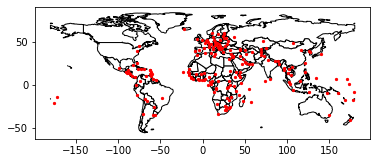

In [228]:
#using matplotlib

fig, ax = plt.subplots()

# set aspect to equal. This is done automatically
# when using *geopandas* plot on it's own, but not when
# working with pyplot directly.
ax.set_aspect('equal')

world.plot(ax=ax, color='white', edgecolor='black')
cities.plot(ax=ax, marker='o', color='red', markersize=5)
plt.show()

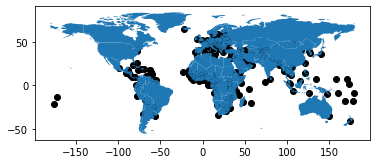

In [229]:
# to control the order of multiple layers
ax = cities.plot(color='k')

world.plot(ax=ax);

<AxesSubplot:>

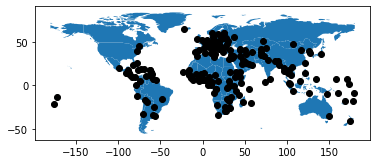

In [230]:
ax = cities.plot(color='k', zorder=2)

world.plot(ax=ax, zorder=1)

In [231]:
#cities['name'].isin(['Houston','Cairo'])    # Check column contains Particular value of DataFrame
#cities.to_excel(r'test.xlsx', index=False)
#cities.head()

df_cities = pd.read_excel(r'Data/worldcities.xlsx')
#df_cities.head()
gdf_cities = gpd.GeoDataFrame(
    df_cities, geometry=gpd.points_from_xy(df_cities.lng, df_cities.lat))

gdf_cities.head()


,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id,geometry
0,Tokyo,Tokyo,35.6839,139.7744,Japan,JP,JPN,Tōkyō,primary,39105000.0,1392685764,POINT (139.77440 35.68390)
1,Jakarta,Jakarta,-6.2146,106.8451,Indonesia,ID,IDN,Jakarta,primary,35362000.0,1360771077,POINT (106.84510 -6.21460)
2,Delhi,Delhi,28.6667,77.2167,India,IN,IND,Delhi,admin,31870000.0,1356872604,POINT (77.21670 28.66670)
3,Manila,Manila,14.6000,120.9833,Philippines,PH,PHL,Manila,primary,23971000.0,1608618140,POINT (120.98330 14.60000)
4,São Paulo,Sao Paulo,-23.5504,-46.6339,Brazil,BR,BRA,São Paulo,admin,22495000.0,1076532519,POINT (-46.63390 -23.55040)


In [232]:
gdf_cities_select = gdf_cities.loc[
    (gdf_cities['city'] == 'Houston') & (gdf_cities['country'] == 'United States') |
    (gdf_cities['city'] == 'Neuquén') |
    (gdf_cities['city'] == 'Stavanger')
    ]


# Applying an IF condition in Pandas DataFrame
#cities_select = cities
#cities_select.loc[ (cities_select['name'] == 'Houston') | (cities_select['name'] == 'Neuquen') | (cities_select['name'] == 'Teheran') | (cities_select['name'] == 'Stavanger'), 'Select'] = 1 


gdf_cities_select.tail()

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id,geometry
121,Houston,Houston,29.7863,-95.3889,United States,US,USA,Texas,NaN,5464251.0,1840020925,POINT (-95.38890 29.78630)
2546,Neuquén,Neuquen,-38.9573,-68.0455,Argentina,AR,ARG,Neuquén,admin,231198.0,1032525768,POINT (-68.04550 -38.95730)
3988,Stavanger,Stavanger,58.9701,5.7333,Norway,NO,NOR,Rogaland,admin,129300.0,1578801684,POINT (5.73330 58.97010)


<AxesSubplot:>

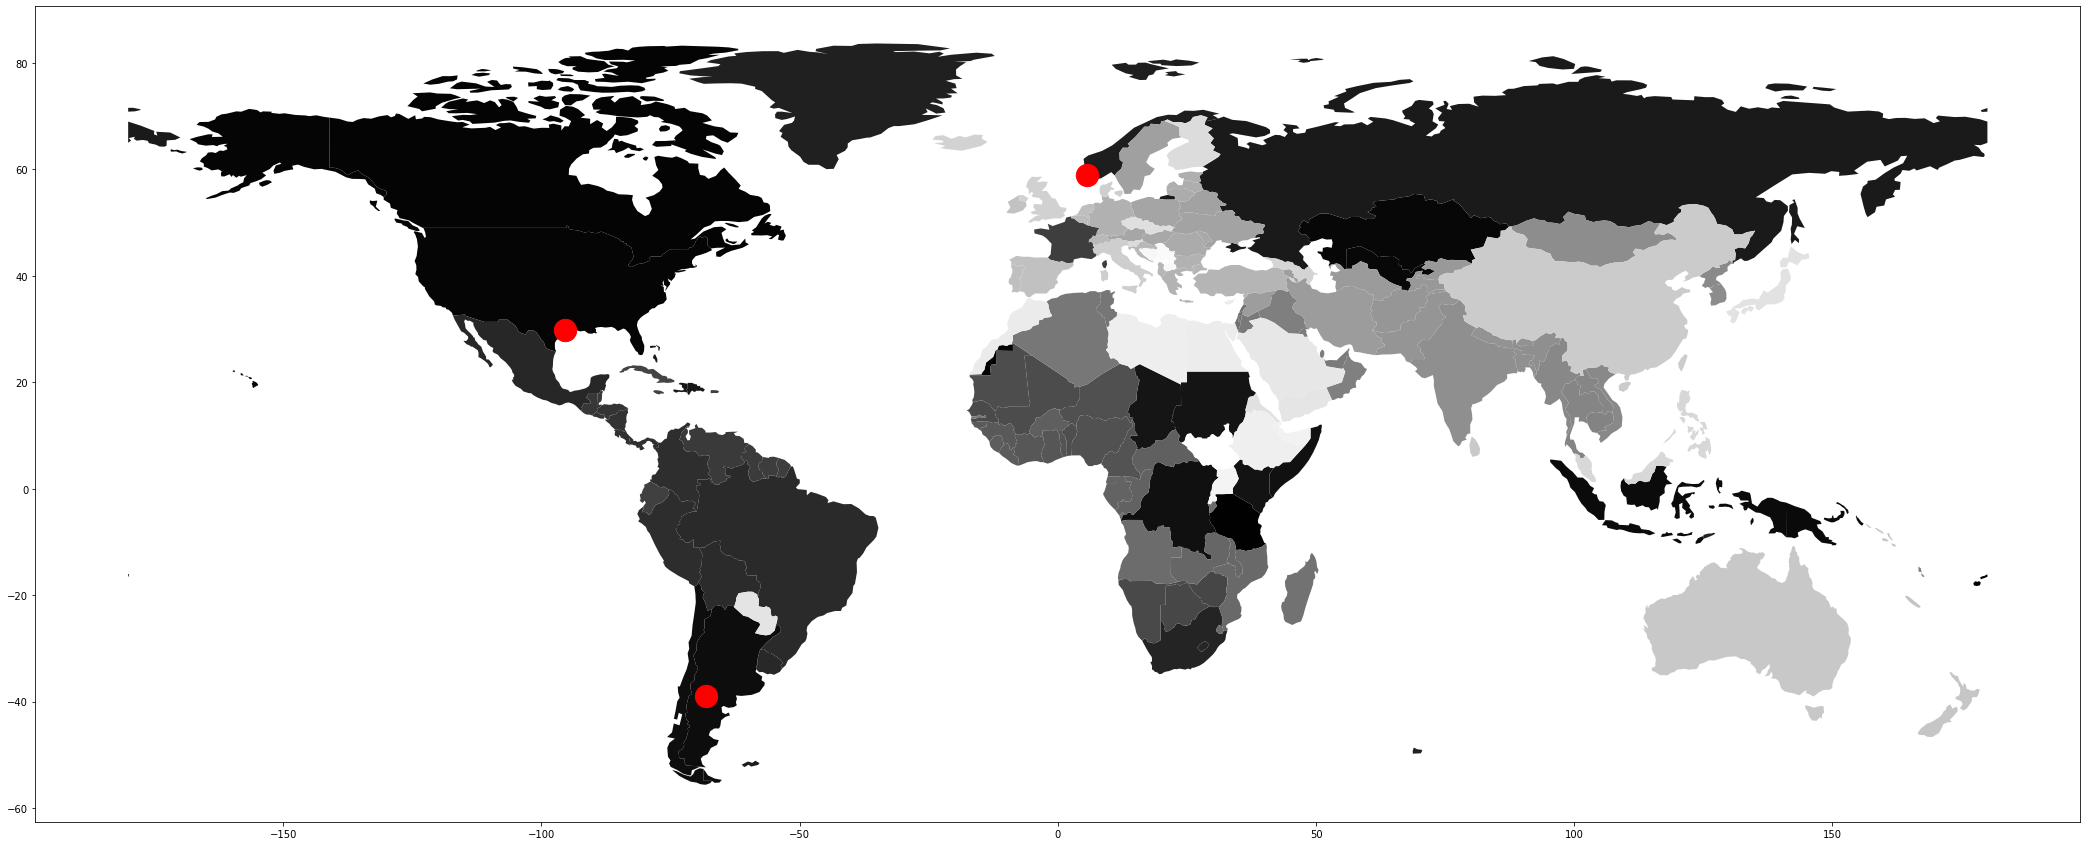

In [283]:

ax = gdf_cities_select.plot(color='r', zorder=2, figsize=(150,15), markersize = 500, legend=True)

world.plot(ax=ax, zorder=1, cmap = 'gray')

In [249]:
#ax = gdf_cities_select.plot(color='r', zorder=2)

#world.explore(column='pop_est', cmap = 'Set2')